In [1]:
import os

In [2]:
import glob

In [3]:
path_train=r'C:\Users\atefe\Desktop\y\dataset\train\*.tif'
path_train_xml=r'C:\Users\atefe\Desktop\y\dataset\train_xml\*.xml'
path_test=r'C:\Users\atefe\Desktop\y\dataset\test\*.tif'

In [4]:
def list_path(pathtrain_xml, pathtrain, pathtest):
    '''this function creates 3 lists for the paths of train,train_xml and test files'''
    list_xml = glob.glob(pathtrain_xml)
    list_train = glob.glob(pathtrain)
    list_test = glob.glob(pathtest)
    return (list_xml, list_train, list_test)

In [5]:
xml,train,test=list_path(path_train_xml, path_train, path_test)


In [6]:
test

['C:\\Users\\atefe\\Desktop\\y\\dataset\\test\\0148e4778e6d8b22a8980bf4fc89351b_12.tif',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\test\\0148e4778e6d8b22a8980bf4fc89351b_25.tif',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\test\\0148e4778e6d8b22a8980bf4fc89351b_30.tif',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\test\\0148e4778e6d8b22a8980bf4fc89351b_37.tif',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\test\\0171cd73c7bdbf48ccfd0c21804f9ced_1.tif',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\test\\02148af935993f360f2d9c3ca3eb782a_10.tif',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\test\\02148af935993f360f2d9c3ca3eb782a_8.tif',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\test\\02701be3fc048a3b7e2ce7a4b2a05aad.tif',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\test\\0370ca51b827c0f72a8f6b6a83e4411a.tif',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\test\\051781786f9fb429f4cc6508ac8e0676_3.tif',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\test\\0533a1e934bd69947b247d0e858d854f_4.tif',
 'C:\\Users\\atefe\\Desktop\\y\

In [20]:
path_tr=r'C:\Users\atefe\Desktop\y\dataset\train'
path_xml=r'C:\Users\atefe\Desktop\y\dataset\train_xml'
path_tes=r'C:\Users\atefe\Desktop\y\dataset\test'
def list_file_name(path: str):
    file_name = []
    p = os.listdir(path)

    for i in range(len(p)):
        file_name.append(p[i])
    return file_name

In [21]:
file_xml=list_file_name(path_xml)

In [22]:
file_xml

['00060f1db73c837c2b943fec640f920a_1.xml',
 '00060f1db73c837c2b943fec640f920a_2.xml',
 '00ba5cc657c8c203c4ed5e339f7d50e9.xml',
 '00e7102949667386cd2d40b1f8b134b6.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_1.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_10.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_11.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_13.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_14.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_15.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_16.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_17.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_18.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_19.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_2.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_20.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_21.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_22.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_23.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_24.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_26.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_27.xml',
 '0148e4778e6d8b22a8980bf4fc89351b_28.xml'

In [25]:
import xml.etree.ElementTree as ET
tree = ET.parse(xml[0])
root = tree.getroot()
DL_DOCUMENT=root.find('{http://lamp.cfar.umd.edu/GEDI}DL_DOCUMENT')
DL_PAGE=DL_DOCUMENT.find('{http://lamp.cfar.umd.edu/GEDI}DL_PAGE')
page_width=DL_PAGE.attrib['width']
page_height=DL_PAGE.attrib['height']

In [26]:
page_width

'1200'

In [27]:
page_height

'1575'

In [104]:
def boundingbox_yolo_format(xml_file):
    annotation_path=r'C:\Users\atefe\Desktop\y\dataset\annotation'
    xml_path=r'C:\Users\atefe\Desktop\y\dataset\train_xml' 
    destination_signatured=r'C:\Users\atefe\Desktop\y\dataset\signatured'
    destination_unsignatured=r'C:\Users\atefe\Desktop\y\dataset\unsignatured'
    file_path=os.path.join(xml_path, xml_file)
  
    tree = ET.parse(file_path)
    root = tree.getroot()
    DL_DOCUMENT=root.find('{http://lamp.cfar.umd.edu/GEDI}DL_DOCUMENT')
    DL_PAGE=DL_DOCUMENT.find('{http://lamp.cfar.umd.edu/GEDI}DL_PAGE')
    page_width=int(DL_PAGE.attrib['width'])
    page_height=int(DL_PAGE.attrib['height'])
    
    list_data=[]

    for DL_ZONE in DL_PAGE:
        dic=DL_ZONE.attrib
        list_data.append(dic)

    bounding_box=[]
    for i in range(len(list_data)):
        if list_data[i]['gedi_type']=='DLSignature':

            ymin=int(list_data[i]['row'])
            #ymax=int(list_data[i]['row'])+int(list_data[i]['height'])
            height=int(list_data[i]['height'])
            xmin=int(list_data[i]['col'])
            #xmax=int(list_data[i]['col'])+int(list_data[i]['width'])
            width=int(list_data[i]['width'])
            x_center=(xmin+(width/2))/page_width
            y_center=(ymin+(height/2))/page_height 
            weight_nor=width/page_width
            height_nor=height/page_height
            class_ID=0
            bbox=f'{class_ID} {x_center} {y_center} {weight_nor} {height_nor}'
            bounding_box.append(bbox)

  
            text_path = os.path.join(annotation_path, xml_file[:-4] + '.txt')
            with open(text_path, "w") as t:
                t.write("\n".join(bounding_box))
                   


In [105]:
for file in file_xml:

    boundingbox_yolo_format(file)


In [83]:
with open(r'C:\Users\atefe\Desktop\y\dataset\annotation\00060f1db73c837c2b943fec640f920a_1.txt', "r") as file:
    annotation_list = file.read().split("\n")
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

    print(annotation_list)    

[[1.0, 0.6204166666666666, 0.5619047619047619, 0.22416666666666665, 0.04825396825396826]]


In [87]:
from PIL import Image, ImageDraw
image_file = r'C:\Users\atefe\Desktop\y\dataset\annotation\00060f1db73c837c2b943fec640f920a_1.txt'.replace("annotation", "train").replace("txt", "tif")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

In [88]:
import random
random.seed(0)
import matplotlib.pyplot as plt
import numpy as np
class_name_to_id_mapping = {"signature":1}
class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 



#Get the corresponding image file


#Plot the Bounding Box


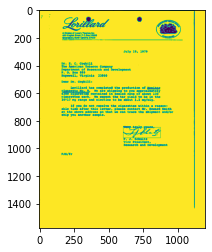

In [89]:
plot_bounding_box(image, annotation_list)

In [93]:
images = [os.path.join(r'C:\Users\atefe\Desktop\y\dataset\yolo_dataset', x) for x in os.listdir(r'C:\Users\atefe\Desktop\y\dataset\yolo_dataset\train')]

In [94]:
images

['C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\00060f1db73c837c2b943fec640f920a_1.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\00ba5cc657c8c203c4ed5e339f7d50e9.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\00e7102949667386cd2d40b1f8b134b6.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_10.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_14.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_16.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_18.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_2.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_20.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_22.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\datase

In [95]:
# Read images and annotations
images = [os.path.join(r'C:\Users\atefe\Desktop\y\dataset\yolo_dataset', x) for x in os.listdir(r'C:\Users\atefe\Desktop\y\dataset\yolo_dataset\train')]
annotations = [os.path.join(r'C:\Users\atefe\Desktop\y\dataset\yolo_dataset', x) for x in os.listdir(r'C:\Users\atefe\Desktop\y\dataset\yolo_dataset\annotation')]

images.sort()
annotations.sort()


In [96]:
images

['C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\00060f1db73c837c2b943fec640f920a_1.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\00ba5cc657c8c203c4ed5e339f7d50e9.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\00e7102949667386cd2d40b1f8b134b6.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_10.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_14.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_16.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_18.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_2.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_20.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_22.jpg',
 'C:\\Users\\atefe\\Desktop\\y\\datase

In [97]:
annotations

['C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\00060f1db73c837c2b943fec640f920a_1.txt',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\00ba5cc657c8c203c4ed5e339f7d50e9.txt',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\00e7102949667386cd2d40b1f8b134b6.txt',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_10.txt',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_14.txt',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_16.txt',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_18.txt',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_2.txt',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_20.txt',
 'C:\\Users\\atefe\\Desktop\\y\\dataset\\yolo_dataset\\0148e4778e6d8b22a8980bf4fc89351b_22.txt',
 'C:\\Users\\atefe\\Desktop\\y\\datase

In [100]:
#from sklearn.model_selection import train_test_split
#train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
